# Background and Foreground Subtraction

Background subtraction is a computer vision technique where we seek to isolate the background from the 'moving' foreground. Consider vehciles traversing a roadway, or persons walking along a sidewalk. 

It sounds simple in theory (i.e. just keep the station pixels and remove the ones that were changing). However, things like lighting condition changes, shadows etc. can make things get more complicated. 

Several algorithms were introduced for this purpose. In the following, we will have a look at two algorithms from the **bgsegm** module.

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [46]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = "../../res/img/Lions/03a0ceb0342e6ef9.jpg"
IMG_PATH

'../../res/img/Lions/03a0ceb0342e6ef9.jpg'

---
### Loading data

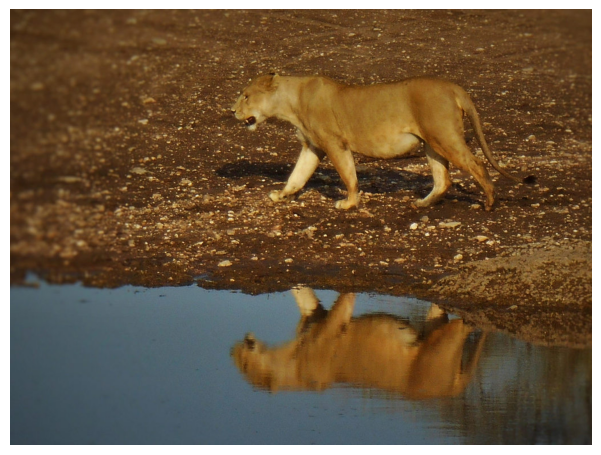

(768, 1024, 3)

In [47]:
img = cv2.imread(IMG_PATH)
imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

---
### Gaussian Mixture-based Background/Foreground Segmentation Algorithm

In this paper, we propose a background subtraction (BGS) method based on the Gaussian mixture models using color and depth information. For combining color and depth information, we used the probabilistic model based on Gaussian distribution. In particular, we focused on solving color camouflage problem and depth denoising. For evaluating our method, we built a new dataset containing normal, color camouflage and depth camouflage situations. The dataset files consist of color, depth and ground truth image sequences. With these files, we compared the proposed algorithm with the conventional color-based BGS techniques in terms of precision, recall and F-measure. As a result, our method showed the best performance. Thus, this technique will help to robustly detect regions of interest as pre-processing in high-level image processing stages.


[Link to Paper](https://www.researchgate.net/publication/283026260_Background_subtraction_based_on_Gaussian_mixture_models_using_color_and_depth_information)

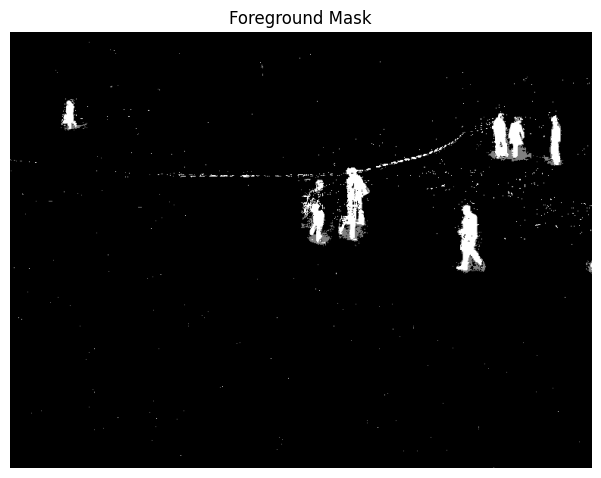

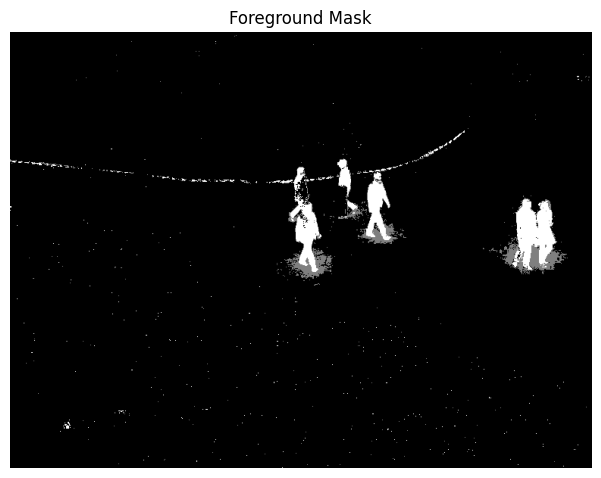

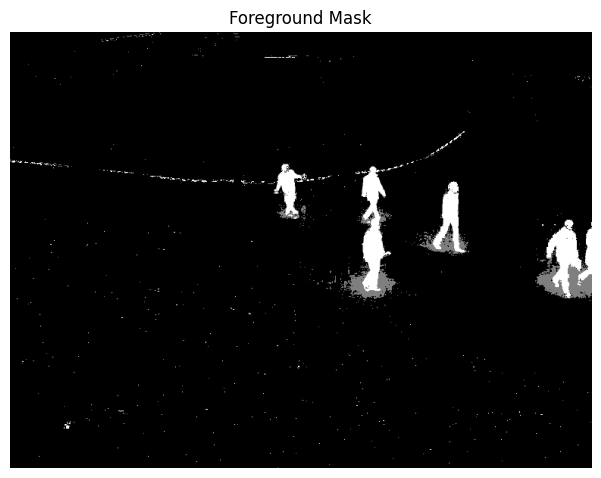

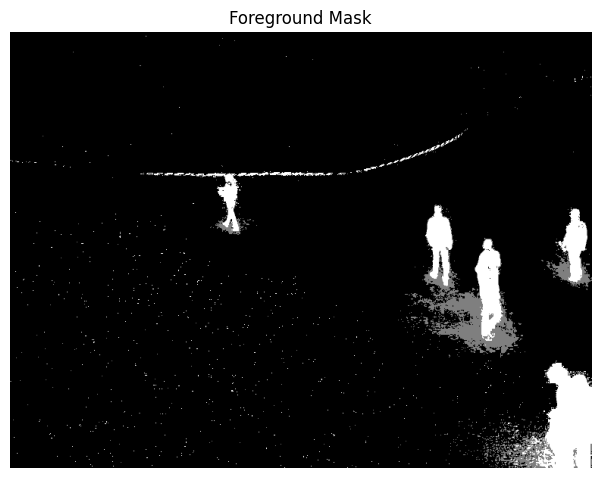

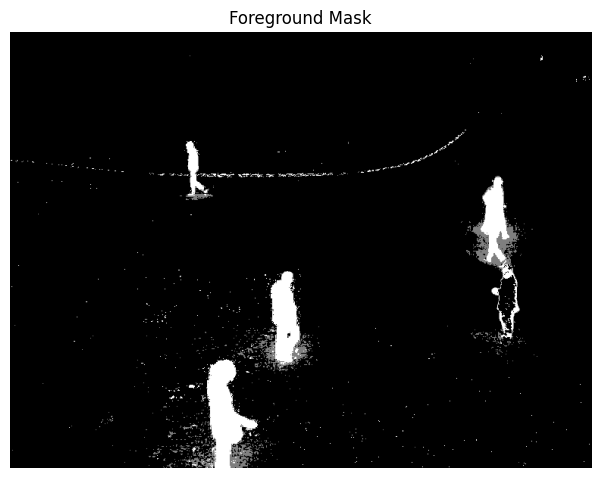

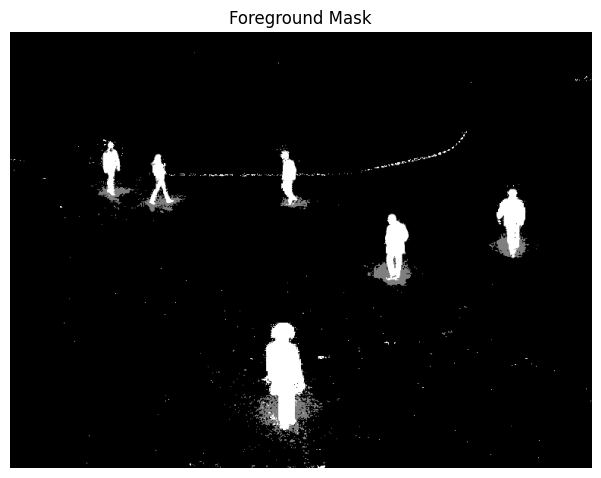

In [69]:
cap = cv2.VideoCapture('../../res/img/course_img/walking.avi')

width = int(cap.get(3))
height = int(cap.get(4))

out = cv2.VideoWriter('../../res/img/course_img/walking_output_MOG.avi', 
                        cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (width, height))

fg_bg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()

    if ret:
        fg_mask = fg_bg.apply(frame)
        out.write(fg_mask)
        if np.random.rand() < 0.01:
            imshow(fg_mask, "Foreground Mask")
    else:
        break

cap.release()
out.release()

---
### Foreground Subtraction

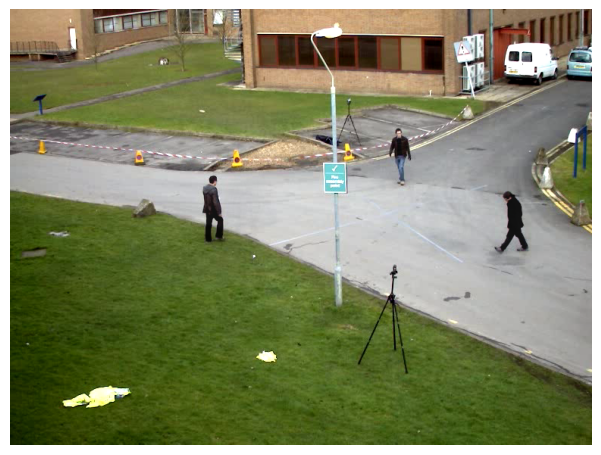

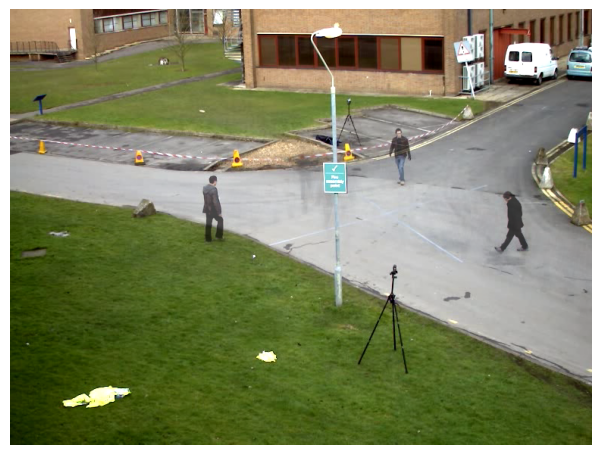

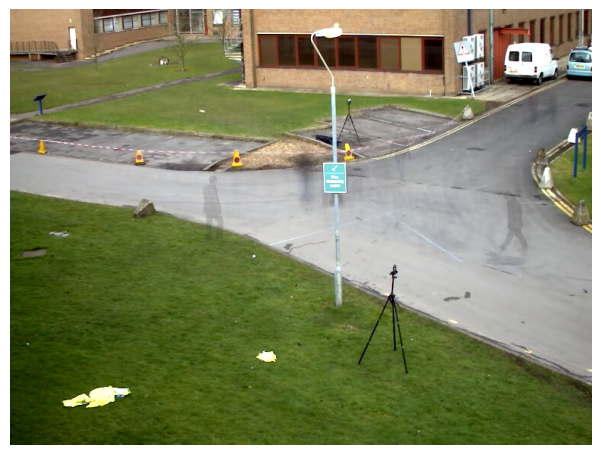

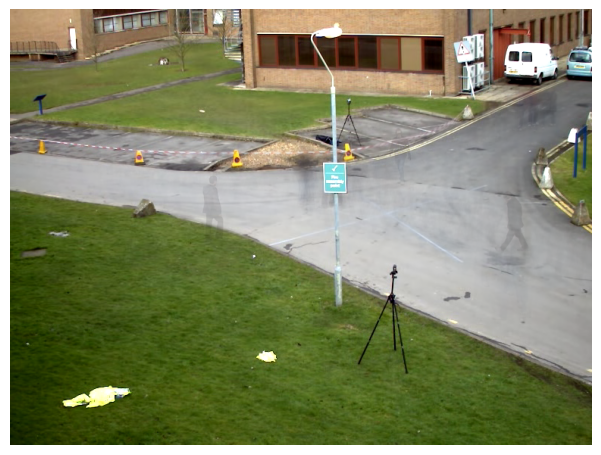

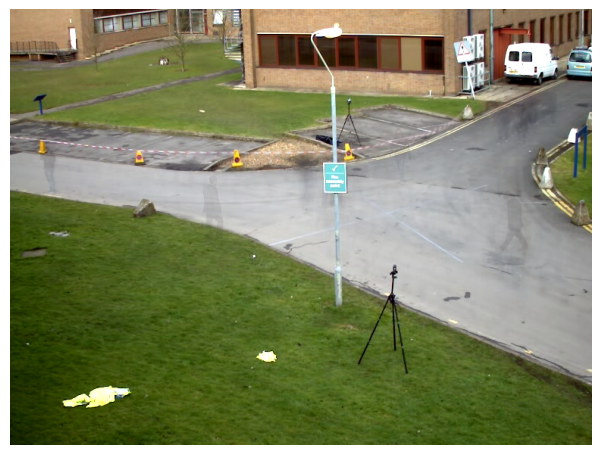

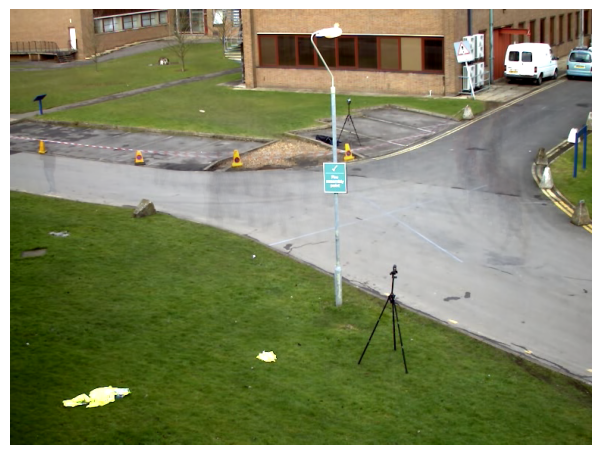

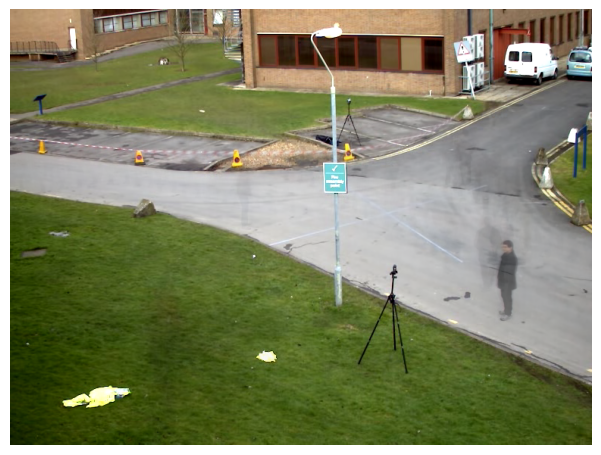

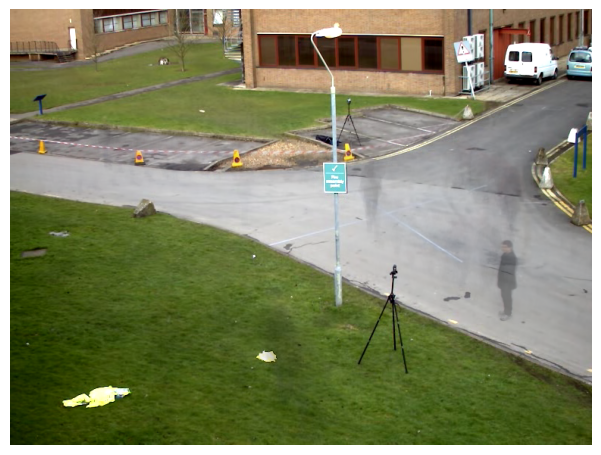

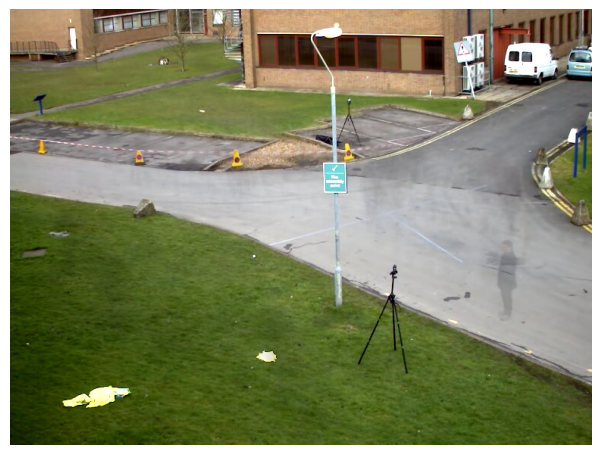

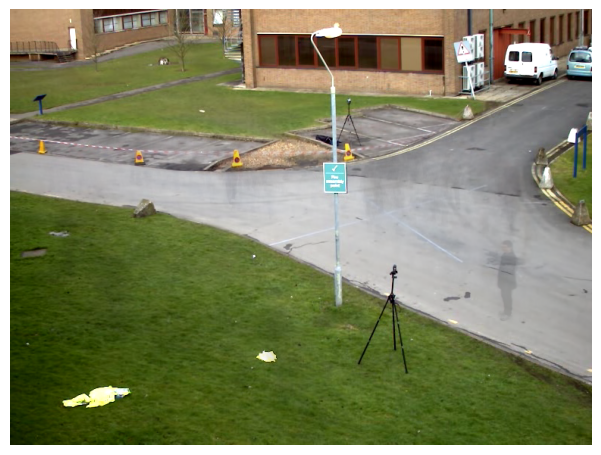

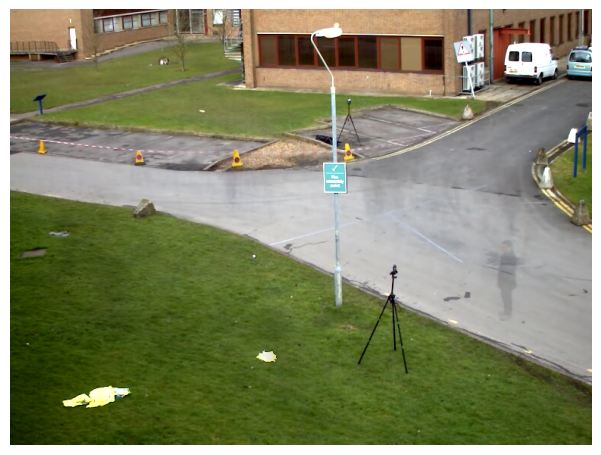

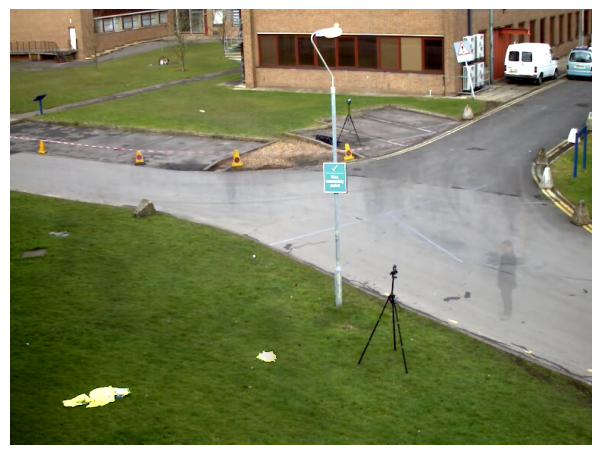

In [70]:
cap = cv2.VideoCapture('../../res/img/course_img/walking.avi')

width = int(cap.get(3))
height = int(cap.get(4))

out = cv2.VideoWriter('../../res/img/course_img/walking_output_fg.avi', 
                        cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (width, height))
ret, frame = cap.read()

average = np.float32(frame)

while True:
    ret, frame = cap.read()
    
    if ret:
        cv2.accumulateWeighted(frame, average, 0.01)
        background = cv2.convertScaleAbs(average)
        out.write(background)
        if np.random.rand() < 0.01:
            imshow(background)
    else:
        break

cap.release()
out.release()

---
### Background Subtraction KNN

The parameters if you wish to veer away from the default settings:

- **history** is the number of frames used to build the statistic model of the background. The smaller the value is, the faster changes in the background will be taken into account by the model and thus be considered as background. And vice versa.
- **dist2Threshold** is a threshold to define whether a pixel is different from the background or not. The smaller the value is, the more sensitive movement detection is. And vice versa.
- **detectShadows** : If set to true, shadows will be displayed in gray on the generated mask. (Example bellow)

https://docs.opencv.org/master/de/de1/group__video__motion.html#gac9be925771f805b6fdb614ec2292006d

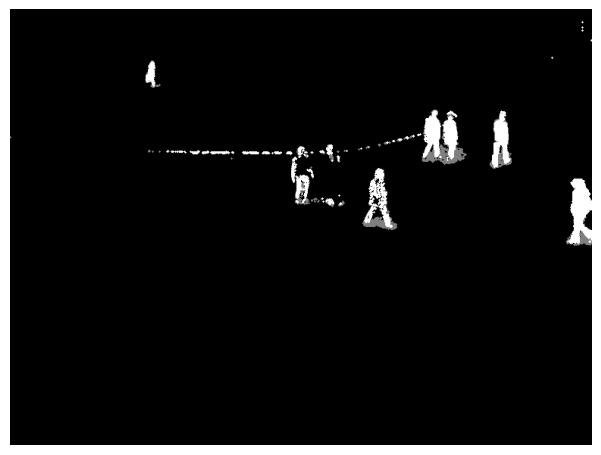

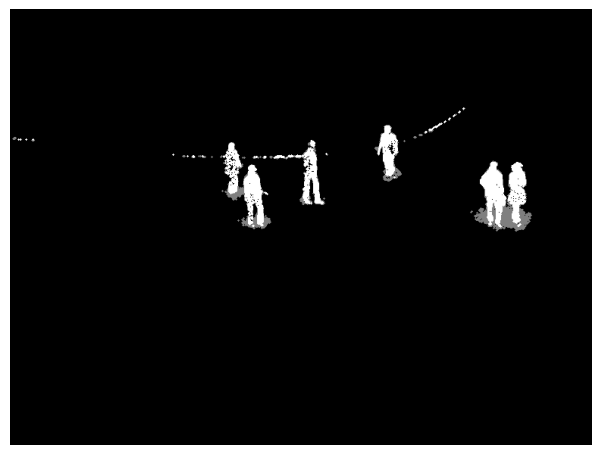

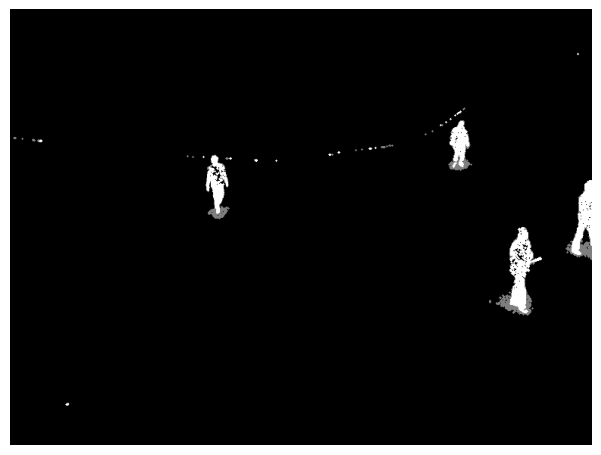

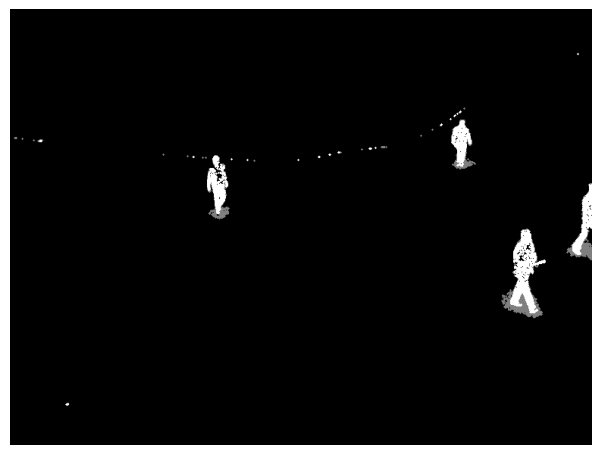

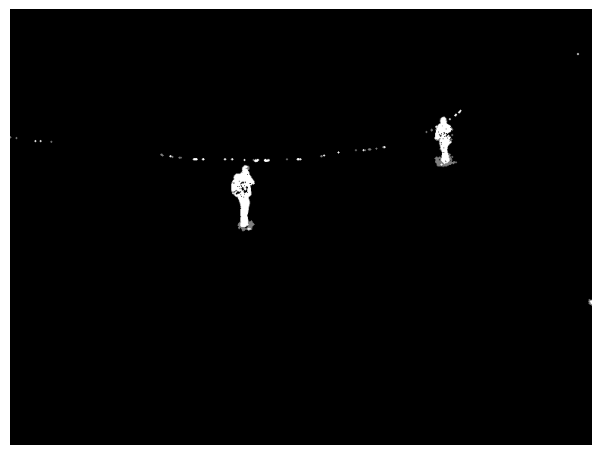

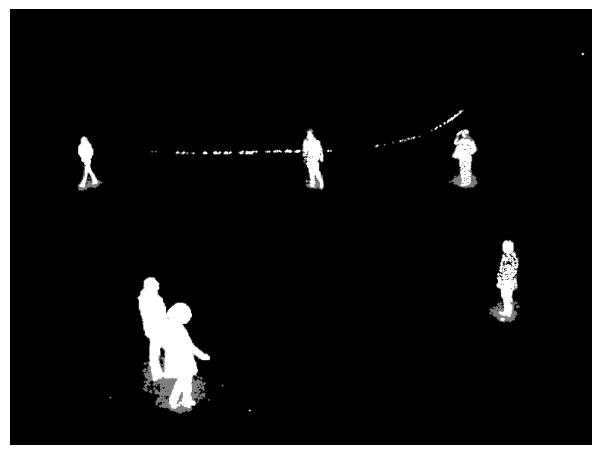

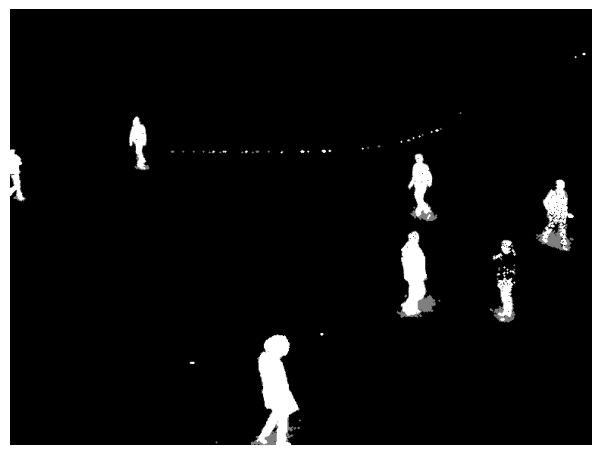

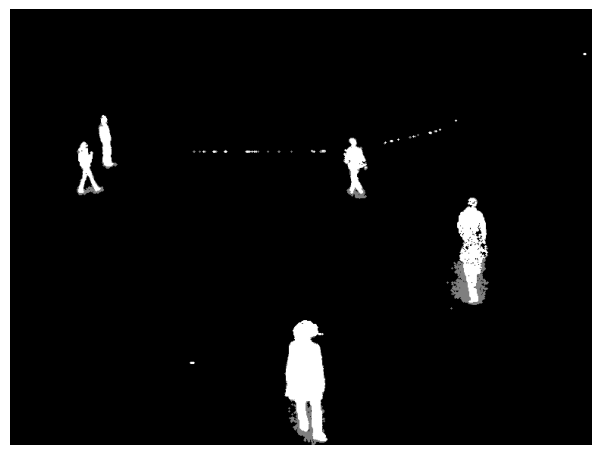

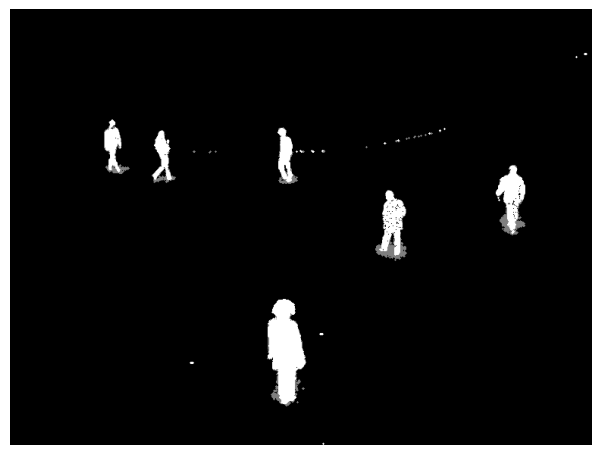

In [73]:
cap = cv2.VideoCapture('../../res/img/course_img/walking.avi')

width = int(cap.get(3))
height = int(cap.get(4))

out = cv2.VideoWriter('../../res/img/course_img/walking_output_KNN.avi', 
                        cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (width, height))

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
fg_bg = cv2.createBackgroundSubtractorKNN()

while True:
    ret, frame = cap.read()
    
    if ret:
        fg_mask = fg_bg.apply(frame)
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
        out.write(background)
        if np.random.rand() < 0.01:
            imshow(fg_mask)
    else:
        break

cap.release()
out.release()

---